## Top 5 Institutes NIRF Data Analysis 

Here we took the data from the nirf website <a href="https://www.nirfindia.org/2021/EngineeringRanking.html">https://www.nirfindia.org/2021/EngineeringRanking.html</a> and analyse that for top 5 institutes as fund spending and getting fund and total intake or placed students etc.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import requests
import re
import unicodedata
import warnings
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
warnings.filterwarnings('ignore')

In [3]:
# import opendatasets as od
# od.download("https://www.nirfindia.org/2021/EngineeringRanking.html")

Loading the data...

In [4]:
data = pd.read_html("https://www.nirfindia.org/2021/EngineeringRanking.html")
print(f'Total tables: {len(data)}')

Total tables: 201


Converting it into Dataframe

In [5]:
df = data[0]
df.head()

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,90.19,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,88.96,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,85.16,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,83.22,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,82.03,5


Our top 5 Engineering Institutes

In [6]:
top = df.head(5)
top

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,90.19,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,88.96,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,85.16,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,83.22,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,82.03,5


Bar plot for Institute rank vs score

<AxesSubplot:xlabel='Rank', ylabel='Score'>

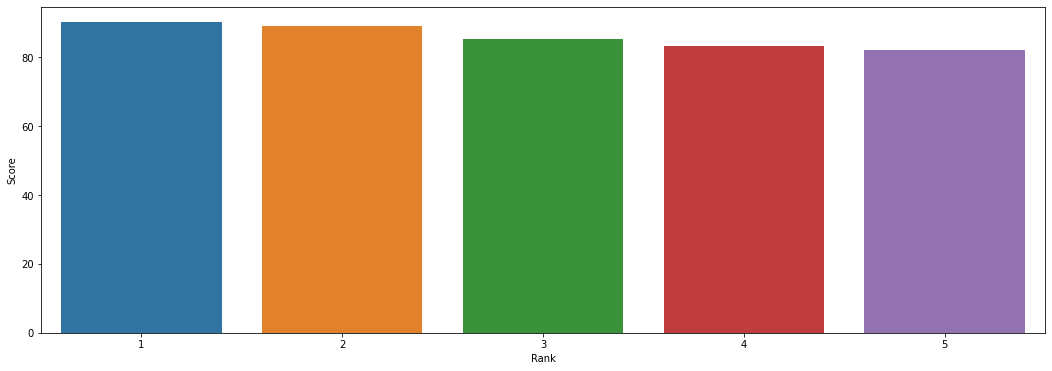

In [7]:
plt.figure(figsize=(18,6))
sns.barplot(x='Rank', y='Score', data=top, capsize=2)

In [8]:
df.info

<bound method DataFrame.info of      Institute ID                                               Name  \
0     IR-E-U-0456  Indian Institute of Technology MadrasMore Deta...   
1     IR-E-I-1074  Indian Institute of Technology DelhiMore Detai...   
2     IR-E-U-0306  Indian Institute of Technology BombayMore Deta...   
3     IR-E-I-1075  Indian Institute of Technology KanpurMore Deta...   
4     IR-E-U-0573  Indian Institute of Technology KharagpurMore D...   
..            ...                                                ...   
195   IR-E-C-1438  The National Institute of EngineeringMore Deta...   
196  IR-E-C-33584  K. J. Somaiya College of EngineeringMore Detai...   
197  IR-E-C-27400  Kakatiya Institute of Technology & ScienceMore...   
198  IR-E-C-11015      Walchand College of EngineeringMore Details |   
199   IR-E-U-0037          Sri Venkateswara UniversityMore Details |   

          City           State  Score  Rank  
0      Chennai      Tamil Nadu  90.19     1  
1    New De

Data correlation and heatmap

In [9]:
top.corr()

,Score,Rank
Score,1.000000,-0.981911
Rank,-0.981911,1.000000


<AxesSubplot:>

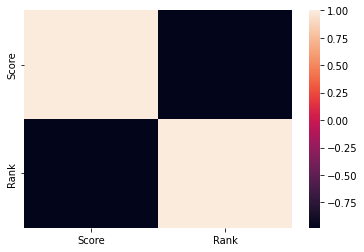

In [10]:
sns.heatmap(top.corr())

In [11]:
top

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,90.19,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,88.96,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,85.16,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,83.22,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,82.03,5


our top institutes with their rank and score in India

Historical and line graph of rank and score

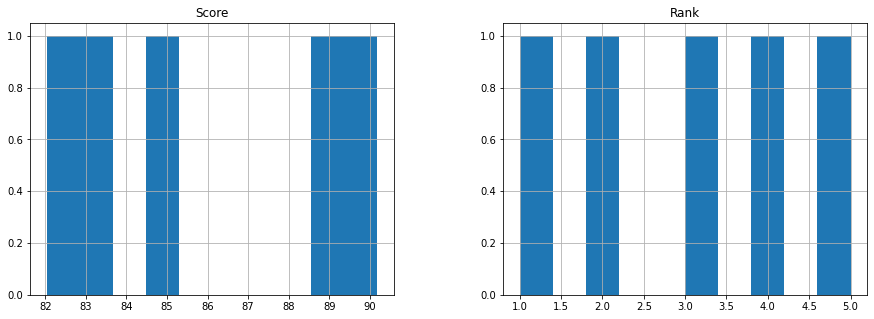

In [12]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
top.hist(ax = ax)
plt.show()

<AxesSubplot:xlabel='Rank'>

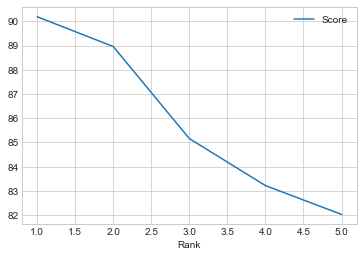

In [13]:
plt.style.use('seaborn-whitegrid')
top.plot.line(x='Rank', y=['Score'])

Our top 10 Institutes

In [14]:
df.head(10)

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,90.19,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,88.96,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,85.16,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,83.22,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,82.03,5
5,IR-E-U-0560,Indian Institute of Technology RoorkeeMore Det...,Roorkee,Uttarakhand,78.08,6
6,IR-E-U-0053,Indian Institute of Technology GuwahatiMore De...,Guwahati,Assam,73.84,7
7,IR-E-U-0013,Indian Institute of Technology HyderabadMore D...,Hyderabad,Telangana,68.69,8
8,IR-E-U-0467,National Institute of Technology Tiruchirappal...,Tiruchirappalli,Tamil Nadu,66.08,9
9,IR-E-U-0237,National Institute of Technology KarnatakaMore...,Surathkal,Karnataka,64.19,10


By linear Regression score prediction

In [15]:
from sklearn import linear_model
import numpy as np

reg = linear_model.LinearRegression()
X = top[['Rank']]
y = top[['Score']]
reg.fit(X, y)

pred = reg.predict(df[['Rank']][5:10])
score = df['Score']

##Let's see our predicted score and actual score side by side
print('prediction\n-----------------------\n', pred,'\n--------------------\nScore\n---------------------\n', score[5:10])

prediction
-----------------------
 [[79.294]
 [77.088]
 [74.882]
 [72.676]
 [70.47 ]] 
--------------------
Score
---------------------
 5    78.08
6    73.84
7    68.69
8    66.08
9    64.19
Name: Score, dtype: float64


As we can see too much close score predicted to actual score

Intitutes ID's

In [16]:
inst_id = [x for x in top['Institute ID']]
inst_id

['IR-E-U-0456', 'IR-E-I-1074', 'IR-E-U-0306', 'IR-E-I-1075', 'IR-E-U-0573']

Downloading the detailed file for each Institutes in NIRF TOP5 folder

In [17]:
import wget

for i in inst_id:
    print(f'\nfile is being downloaded for Institute ID: {i}...')
    url = f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{i}.pdf'
    wget.download(url, f'NIRF TOP5/{i}.pdf')


file is being downloaded for Institute ID: IR-E-U-0456...
100% [..............................................................................] 11452 / 11452
file is being downloaded for Institute ID: IR-E-I-1074...
100% [..............................................................................] 10071 / 10071
file is being downloaded for Institute ID: IR-E-U-0306...
100% [..............................................................................] 10211 / 10211
file is being downloaded for Institute ID: IR-E-I-1075...
100% [................................................................................] 8658 / 8658
file is being downloaded for Institute ID: IR-E-U-0573...
100% [..............................................................................] 12022 / 12022

## IIT Madras

Reading the first Institute file by tabula

In [18]:
import tabula

df1 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{inst_id[0]}.pdf', pages='all')

df12 = df1[2]
df12

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,466,441,2015-16,0,2017-18,334,283,1306000(Thirteen\rlakhs six thousand),51
1,2015-16,466,458,2016-17,0,2018-19,362,268,1360000(Thirteen\rLakhs Sixty thousand),65
2,2016-17,466,465,2017-18,0,2019-20,374,286,1500000(Fifteen lakhs),43


Drop unnecessory attributes from Dataframe

In [19]:
unData = ['Academic Year.1', 'Academic Year.2']
df12 = df12.drop(unData, 1)
df12

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,466,441,0,334,283,1306000(Thirteen\rlakhs six thousand),51
1,2015-16,466,458,0,362,268,1360000(Thirteen\rLakhs Sixty thousand),65
2,2016-17,466,465,0,374,286,1500000(Fifteen lakhs),43


Scatterred plot between No. of first year students admitted in the year and No. of students graduating in minimum stipulated time

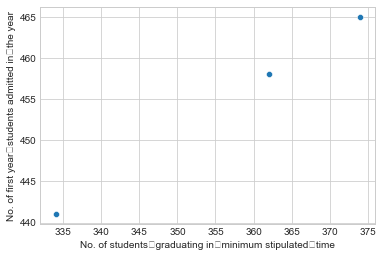

In [20]:
sns.scatterplot(y="No. of first year\rstudents admitted in\rthe year", x="No. of students\rgraduating in\rminimum stipulated\rtime", data=df12)
plt.ylabel("No. of first year\rstudents admitted in\rthe year",fontsize=10)
plt.xlabel("No. of students\rgraduating in\rminimum stipulated\rtime",fontsize=10)
plt.show()

Line plot between No. of students vs Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rplaced'>

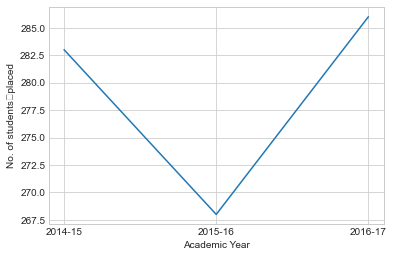

In [21]:
sns.lineplot(data=df12, y='No. of students\rplaced', x='Academic Year')

Here we can analyse that in the last three years max students were placed in 2016-17 and min students in 2015-16 as compared to 2014-15

Line plot between No. of students selected for higher studies vs Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rselected for Higher\rStudies'>

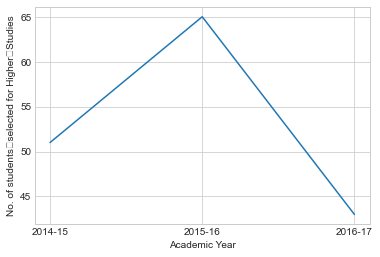

In [22]:
sns.lineplot(data=df12, y='No. of students\rselected for Higher\rStudies', x='Academic Year')

#### Financial Data

In [23]:
df111 = df1[11]
df111

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,612,580,579
1,Total no. of Funding Agencies,104,69,88
2,Total Amount Received (Amount in Rupees),3903460211,5223395988,3177083996
3,Amount Received in Words,Three Hundred and Ninety Crore Thirty four lak...,Five hundred and Twenty Two Crore Thirty Three...,Three hundred and Seventeen Crore Seventy lakh...


In [24]:
df111 = df111.T
df111.reset_index(inplace=True)
df111.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
df111

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,612,104,3903460211,Three Hundred and Ninety Crore Thirty four lak...
2,2018-19,580,69,5223395988,Five hundred and Twenty Two Crore Thirty Three...
3,2017-18,579,88,3177083996,Three hundred and Seventeen Crore Seventy lakh...


In [25]:
df111=df111.drop(0)
df111

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,612,104,3903460211,Three Hundred and Ninety Crore Thirty four lak...
2,2018-19,580,69,5223395988,Five hundred and Twenty Two Crore Thirty Three...
3,2017-18,579,88,3177083996,Three hundred and Seventeen Crore Seventy lakh...


In [26]:
df111=df111.drop(['Amount Received in Words'], axis =1)
df111

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,612,104,3903460211
2,2018-19,580,69,5223395988
3,2017-18,579,88,3177083996


In [27]:
df111.describe()

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
count,3,3,3,3
unique,3,3,3,3
top,2019-20,579,88,5223395988
freq,1,1,1,1


In [28]:
df111 = df111.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
df111.dtypes

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object

Box plot representation of total amount recieved 

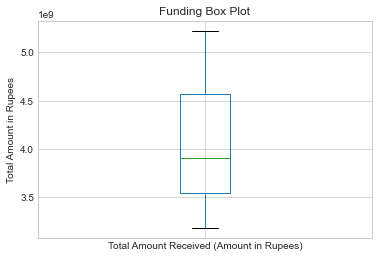

In [29]:
df111['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Funding Box Plot')
plt.ylabel('Total Amount in Rupees')
plt.show()

#### Financial Expenses 

In [30]:
df19 = df1[9]
df19

,Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings),Unnamed: 0,Unnamed: 1,Unnamed: 2
0,"Library ( Books, Journals and e-Resources only)",181223515 (Eighteen Crore Twelve Lakh Twenty T...,174628165 (Seventeen Crore Forty Six Lakh Twen...,188456181 (Eighteen Crore Eighty Four Lakh Fif...
1,New Equipment and software for Laboratories,1865813663 (One Eighty Six crore Fifty Eight l...,2052783456 (Two hundred and Five crore Twenty...,1838176237 (One hundred and Eighty Three crore...
2,Engineering Workshops,519428 (Five Lakh Ninteen Thousand Four Hundre...,4157456 (Forty One Lakh Fifty Seven Thousand F...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...
3,Other expenditure on creation of Capital Asset...,256594552 (Twenty Five Crore Sixty Five Lakh N...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


In [31]:
df19 = df19.T
df19

,0,1,2,3
Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings),"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
Unnamed: 0,181223515 (Eighteen Crore Twelve Lakh Twenty T...,1865813663 (One Eighty Six crore Fifty Eight l...,519428 (Five Lakh Ninteen Thousand Four Hundre...,256594552 (Twenty Five Crore Sixty Five Lakh N...
Unnamed: 1,174628165 (Seventeen Crore Forty Six Lakh Twen...,2052783456 (Two hundred and Five crore Twenty...,4157456 (Forty One Lakh Fifty Seven Thousand F...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...
Unnamed: 2,188456181 (Eighteen Crore Eighty Four Lakh Fif...,1838176237 (One hundred and Eighty Three crore...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


In [32]:
df19.columns = ['Library', 'Software & Equipment', 'Engineering Workshops', 'Others']
df19.reset_index(drop = True, inplace=True)

In [33]:
df19 = df19.drop(0)

In [34]:
df19

,Library,Software & Equipment,Engineering Workshops,Others
1,181223515 (Eighteen Crore Twelve Lakh Twenty T...,1865813663 (One Eighty Six crore Fifty Eight l...,519428 (Five Lakh Ninteen Thousand Four Hundre...,256594552 (Twenty Five Crore Sixty Five Lakh N...
2,174628165 (Seventeen Crore Forty Six Lakh Twen...,2052783456 (Two hundred and Five crore Twenty...,4157456 (Forty One Lakh Fifty Seven Thousand F...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...
3,188456181 (Eighteen Crore Eighty Four Lakh Fif...,1838176237 (One hundred and Eighty Three crore...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


In [35]:
finYear = ['2019-20', '2018-19', '2017-18']
df19['Financial Year'] = finYear

In [36]:
df19

,Library,Software & Equipment,Engineering Workshops,Others,Financial Year
1,181223515 (Eighteen Crore Twelve Lakh Twenty T...,1865813663 (One Eighty Six crore Fifty Eight l...,519428 (Five Lakh Ninteen Thousand Four Hundre...,256594552 (Twenty Five Crore Sixty Five Lakh N...,2019-20
2,174628165 (Seventeen Crore Forty Six Lakh Twen...,2052783456 (Two hundred and Five crore Twenty...,4157456 (Forty One Lakh Fifty Seven Thousand F...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...,2018-19
3,188456181 (Eighteen Crore Eighty Four Lakh Fif...,1838176237 (One hundred and Eighty Three crore...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...,2017-18


##### Graphical Represention of Financial Expenses in each Academic Year

<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

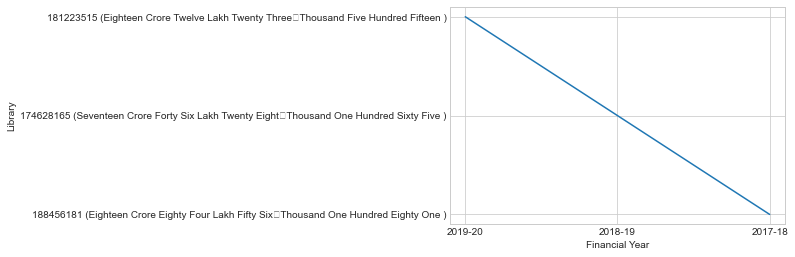

In [37]:
sns.lineplot(data=df19, y='Library', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

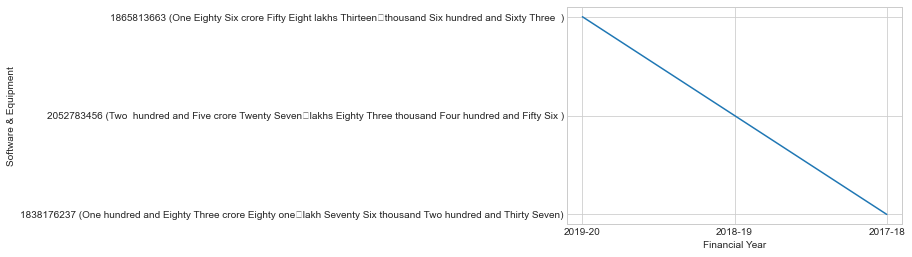

In [38]:
sns.lineplot(data=df19, y='Software & Equipment', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

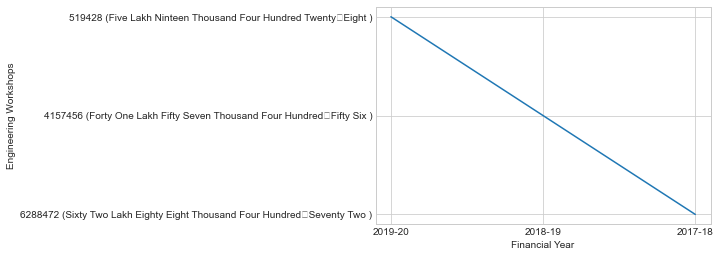

In [39]:
sns.lineplot(data=df19, y='Engineering Workshops', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Others'>

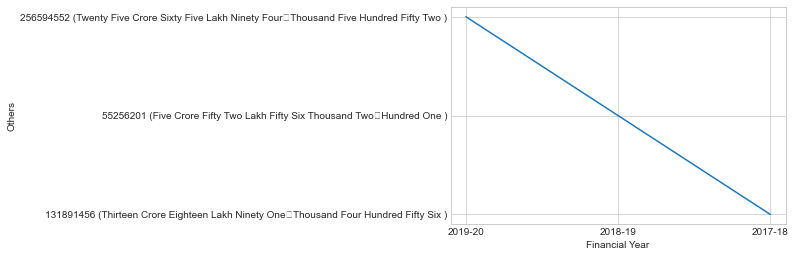

In [40]:
sns.lineplot(data=df19, y='Others', x='Financial Year')

Graphical representation of Financial Year vs Others Expenses

<AxesSubplot:xlabel='Financial Year', ylabel='Others'>

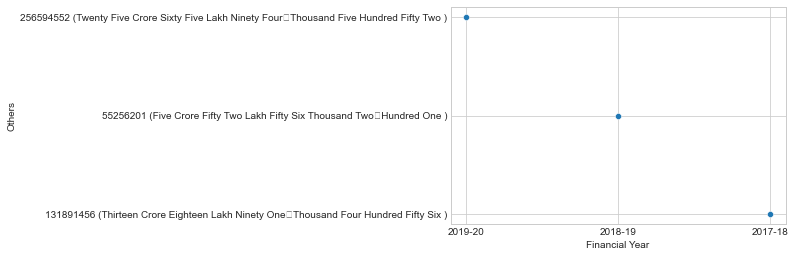

In [41]:
sns.scatterplot(data=df19, x='Financial Year', y='Others')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

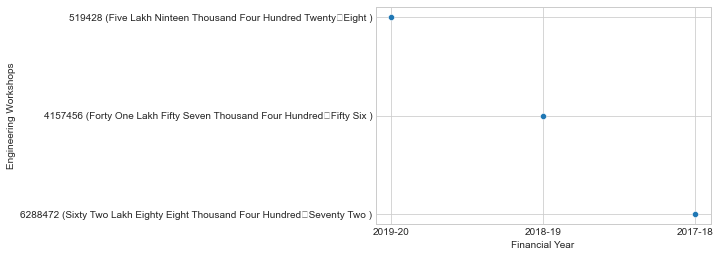

In [42]:
sns.scatterplot(data=df19, x='Financial Year', y='Engineering Workshops')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

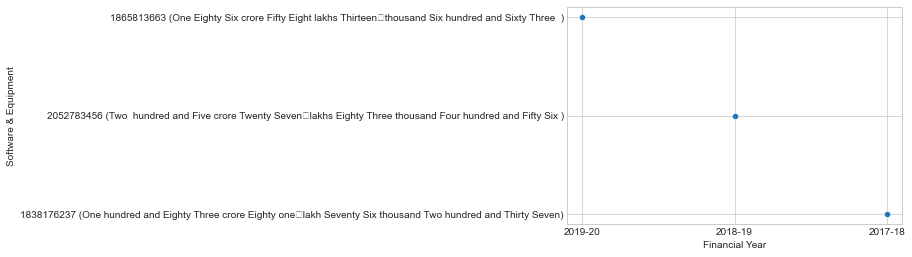

In [43]:
sns.scatterplot(data=df19, x='Financial Year', y='Software & Equipment')

<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

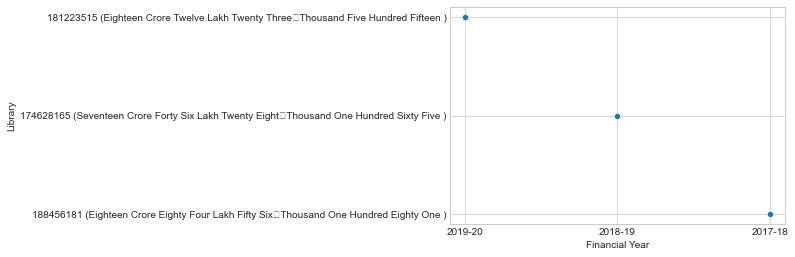

In [44]:
sns.scatterplot(data=df19, x='Financial Year', y='Library')

## IIT Delhi

Reading Data of IIT Delhi

In [45]:
df2 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{inst_id[1]}.pdf', pages='all')

df22 = df2[2]
df22

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,749,759,2015-16,0,2017-18,654,431,1306000(Thirteen Lakh\rSix Thousand Only),70
1,2015-16,749,759,2016-17,0,2018-19,615,495,1570000(Fifteen Lakh\rSeventy Thousand\rOnly),78
2,2016-17,749,751,2017-18,0,2019-20,650,511,1550000(Fifteen Lakh\rFifty Thousand Only),90


Drop unncessory Data attributes

In [46]:
unData = ['Academic Year.1', 'Academic Year.2']
df22 = df22.drop(unData, 1)
df22

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,749,759,0,654,431,1306000(Thirteen Lakh\rSix Thousand Only),70
1,2015-16,749,759,0,615,495,1570000(Fifteen Lakh\rSeventy Thousand\rOnly),78
2,2016-17,749,751,0,650,511,1550000(Fifteen Lakh\rFifty Thousand Only),90


Scatterred plot between No. of first year students admitted in the year and No. of students graduating in minimum stipulated time

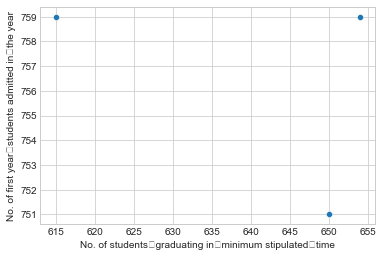

In [47]:
sns.scatterplot(y="No. of first year\rstudents admitted in\rthe year", x="No. of students\rgraduating in\rminimum stipulated\rtime", data=df22)
plt.ylabel("No. of first year\rstudents admitted in\rthe year",fontsize=10)
plt.xlabel("No. of students\rgraduating in\rminimum stipulated\rtime",fontsize=10)
plt.show()

Line plot between No. of students vs Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rplaced'>

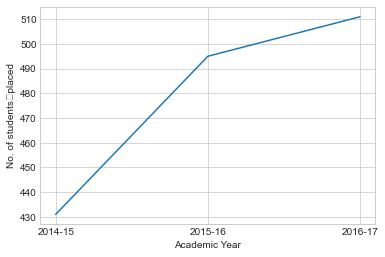

In [48]:
sns.lineplot(data=df22, y='No. of students\rplaced', x='Academic Year')

Here we can analyse that in the last three years max students were in 2016-17 and min students in 2014-15 as compared to 2015-16

Line plot between No. of students selected for higher studies vs Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rselected for Higher\rStudies'>

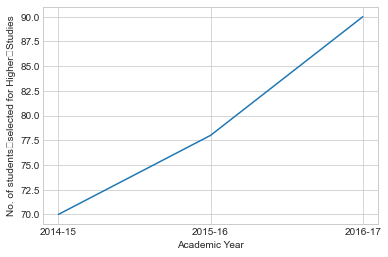

In [49]:
sns.lineplot(data=df22, y='No. of students\rselected for Higher\rStudies', x='Academic Year')

#### Financial Data

In [50]:
df29 = df2[9]
df29

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,624,567,964
1,Total no. of Funding Agencies,195,140,153
2,Total Amount Received (Amount in Rupees),2275026000,2048965952,5411417468
3,Amount Received in Words,Two Hundred Twenty Seven Crore Fifty Lakh Twen...,Two Hundred Four Crore Eighty Nine Lakh Sixty ...,Five Hundred Forty One Crore Fourteen Lakh\rSe...


In [51]:
df29 = df29.T
df29.reset_index(inplace=True)
df29.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
df29

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,624,195,2275026000,Two Hundred Twenty Seven Crore Fifty Lakh Twen...
2,2018-19,567,140,2048965952,Two Hundred Four Crore Eighty Nine Lakh Sixty ...
3,2017-18,964,153,5411417468,Five Hundred Forty One Crore Fourteen Lakh\rSe...


In [52]:
df29=df29.drop(0)
df29


,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,624,195,2275026000,Two Hundred Twenty Seven Crore Fifty Lakh Twen...
2,2018-19,567,140,2048965952,Two Hundred Four Crore Eighty Nine Lakh Sixty ...
3,2017-18,964,153,5411417468,Five Hundred Forty One Crore Fourteen Lakh\rSe...


In [53]:
df29=df29.drop(['Amount Received in Words'], axis =1)
df29

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,624,195,2275026000
2,2018-19,567,140,2048965952
3,2017-18,964,153,5411417468


In [135]:
df29.describe()

,Total Amount Received (Amount in Rupees)
count,3.000000e+00
mean,3.245136e+09
std,1.879456e+09
min,2.048966e+09
25%,2.161996e+09
50%,2.275026e+09
75%,3.843222e+09
max,5.411417e+09


In [55]:
df29 = df29.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
df29.dtypes

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object

Box plot representation of total amount recieved

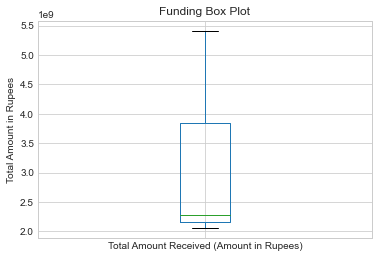

In [56]:
df29['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Funding Box Plot')
plt.ylabel('Total Amount in Rupees')
plt.show()

Here we can see that average is at 2 to 2.5 and high at 3.8 (approximate) and atleast 2.2

#### Financial Expenses

In [57]:
df27 = df2[7]
df27

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",170086147 (Seventeen Crore Eighty Six Thousand...,160271963 (Sixteen Crore Two Lakh Seventy One ...,146125000 (Fourteen Crore Sixty One Lakh Twent...
3,New Equipment and software for Laboratories,1827027685 (One Hundred Eighty Two Crore Seven...,1793766462 (One Hundred Seventy Nine Crore Thi...,1424680000 (One Hundred Forty Two Crore Forty ...
4,Engineering Workshops,4058686 (Forty Lakh Fifty Eight Thousand Six H...,4302116 (Forty Three lakh Two Thousand One Hun...,5399000 (Fifty Three Lakh Ninety Nine Thousand...
5,Other expenditure on creation of Capital Asset...,745381664 (Seventy Four Crore Fifty Three Lakh...,764538188 (Seventy Six Crore Forty five Lakh T...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [58]:
df27 = df27.drop(0)

In [59]:
df27

,Financial Year,2019-20,2018-19,2017-18
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",170086147 (Seventeen Crore Eighty Six Thousand...,160271963 (Sixteen Crore Two Lakh Seventy One ...,146125000 (Fourteen Crore Sixty One Lakh Twent...
3,New Equipment and software for Laboratories,1827027685 (One Hundred Eighty Two Crore Seven...,1793766462 (One Hundred Seventy Nine Crore Thi...,1424680000 (One Hundred Forty Two Crore Forty ...
4,Engineering Workshops,4058686 (Forty Lakh Fifty Eight Thousand Six H...,4302116 (Forty Three lakh Two Thousand One Hun...,5399000 (Fifty Three Lakh Ninety Nine Thousand...
5,Other expenditure on creation of Capital Asset...,745381664 (Seventy Four Crore Fifty Three Lakh...,764538188 (Seventy Six Crore Forty five Lakh T...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [60]:
df27 = df27.drop(1)
df27

,Financial Year,2019-20,2018-19,2017-18
2,"Library ( Books, Journals and e-Resources only)",170086147 (Seventeen Crore Eighty Six Thousand...,160271963 (Sixteen Crore Two Lakh Seventy One ...,146125000 (Fourteen Crore Sixty One Lakh Twent...
3,New Equipment and software for Laboratories,1827027685 (One Hundred Eighty Two Crore Seven...,1793766462 (One Hundred Seventy Nine Crore Thi...,1424680000 (One Hundred Forty Two Crore Forty ...
4,Engineering Workshops,4058686 (Forty Lakh Fifty Eight Thousand Six H...,4302116 (Forty Three lakh Two Thousand One Hun...,5399000 (Fifty Three Lakh Ninety Nine Thousand...
5,Other expenditure on creation of Capital Asset...,745381664 (Seventy Four Crore Fifty Three Lakh...,764538188 (Seventy Six Crore Forty five Lakh T...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [61]:
df27 = df27.T
df27

,2,3,4,5
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...
2018-19,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...
2017-18,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [62]:

df27.columns = ['Library', 'Software & Equipment', 'Engineering Workshops', 'Others']
df27.reset_index(drop = True, inplace=True)

In [63]:
df27

,Library,Software & Equipment,Engineering Workshops,Others
0,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
1,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...
2,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...
3,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [64]:
df27 = df27.drop(0)

In [65]:
df27

,Library,Software & Equipment,Engineering Workshops,Others
1,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...
2,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...
3,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


In [66]:
finYear = ['2019-20', '2018-19', '2017-18']
df27['Financial Year'] = finYear

In [67]:
df27

,Library,Software & Equipment,Engineering Workshops,Others,Financial Year
1,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...,2019-20
2,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...,2018-19
3,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...,2017-18


#### Graphical Represention of Financial Expenses in each Academic Year

<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

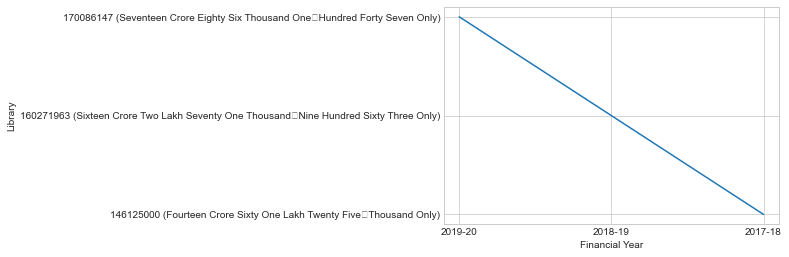

In [68]:
sns.lineplot(data=df27, y='Library', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

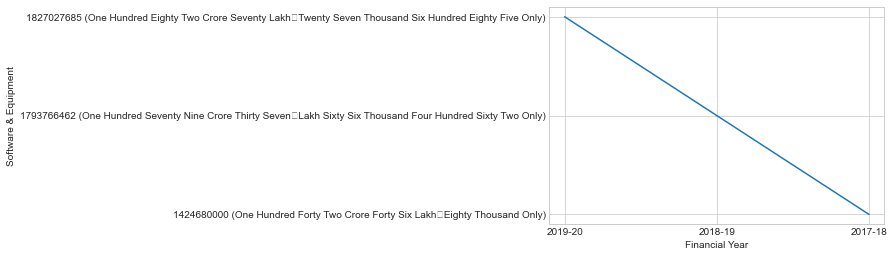

In [69]:
sns.lineplot(data=df27, y='Software & Equipment', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

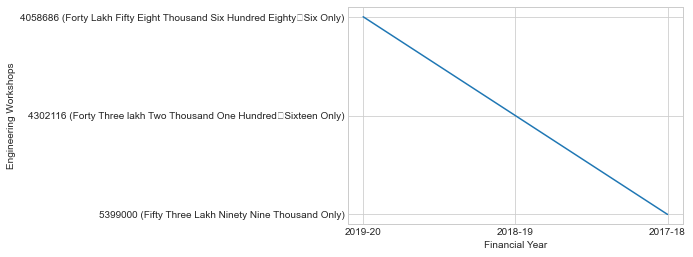

In [70]:
sns.lineplot(data=df27, y='Engineering Workshops', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Others'>

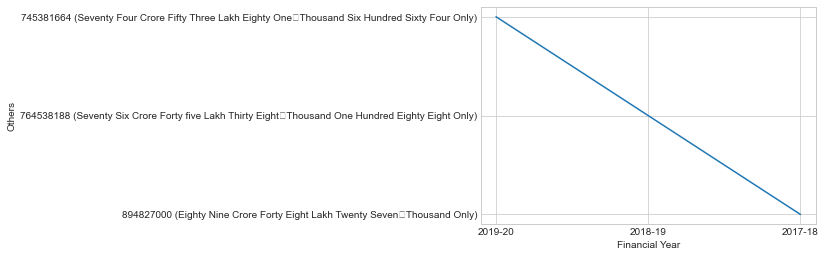

In [71]:
sns.lineplot(data=df27, y='Others', x='Financial Year')

## IIT Bombay

In [72]:
df3 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{inst_id[2]}.pdf', pages='all')

df32 = df3[2]
df32

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,694,682,2015-16,0,2017-18,572,412,1011000(Ten Lakhs\rEleven Thousand),63
1,2015-16,717,666,2016-17,0,2018-19,615,430,1178400(Eleven Lakhs\rSeventy Eight\rThousand ...,125
2,2016-17,717,716,2017-18,0,2019-20,613,448,1300000(Thirteen\rLakhs),116


Drop unnecessory Data Attributes

In [73]:
unData = ['Academic Year.1', 'Academic Year.2']
df32 = df32.drop(unData, 1)
df32

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,694,682,0,572,412,1011000(Ten Lakhs\rEleven Thousand),63
1,2015-16,717,666,0,615,430,1178400(Eleven Lakhs\rSeventy Eight\rThousand ...,125
2,2016-17,717,716,0,613,448,1300000(Thirteen\rLakhs),116


Scatterred plot between No. of first year students admitted in the year and No. of students graduating in minimum stipulated time

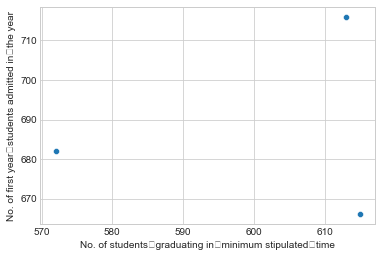

In [74]:
sns.scatterplot(y="No. of first year\rstudents admitted in\rthe year", x="No. of students\rgraduating in\rminimum stipulated\rtime", data=df32)
plt.ylabel("No. of first year\rstudents admitted in\rthe year",fontsize=10)
plt.xlabel("No. of students\rgraduating in\rminimum stipulated\rtime",fontsize=10)
plt.show()

Line plot between No. of students vs Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rplaced'>

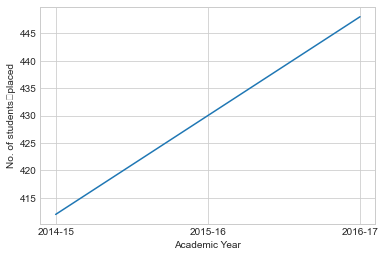

In [75]:
sns.lineplot(data=df32, y='No. of students\rplaced', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rselected for Higher\rStudies'>

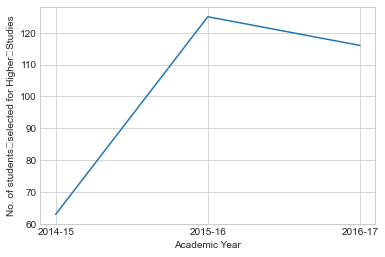

In [76]:
sns.lineplot(data=df32, y='No. of students\rselected for Higher\rStudies', x='Academic Year')

#### Financial Data

In [77]:
df37 = df3[7]
df37

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",233311985 (Twenty Three Crores Thirty Three La...,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,166714860 (Sixteen Crores Sixty Seven Lakh Fou...
3,New Equipment and software for Laboratories,1358206293 (One Hundred Thirty Five Crores Eig...,1203696299 (One Hundred Twenty Crore Thirty Si...,86137020 (Eight Crore Sixty One Lakh Thirty Se...
4,Engineering Workshops,7800414 (Seventy Eight Lakhs Four Hundred and ...,12162794 (One Crore Twenty One Lakhs Sixty Two...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [78]:
df37 = df37.drop(0, axis =0)
df37

,Financial Year,2019-20,2018-19,2017-18
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",233311985 (Twenty Three Crores Thirty Three La...,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,166714860 (Sixteen Crores Sixty Seven Lakh Fou...
3,New Equipment and software for Laboratories,1358206293 (One Hundred Thirty Five Crores Eig...,1203696299 (One Hundred Twenty Crore Thirty Si...,86137020 (Eight Crore Sixty One Lakh Thirty Se...
4,Engineering Workshops,7800414 (Seventy Eight Lakhs Four Hundred and ...,12162794 (One Crore Twenty One Lakhs Sixty Two...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [79]:
df37 = df37.drop(1, axis=0)
df37

,Financial Year,2019-20,2018-19,2017-18
2,"Library ( Books, Journals and e-Resources only)",233311985 (Twenty Three Crores Thirty Three La...,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,166714860 (Sixteen Crores Sixty Seven Lakh Fou...
3,New Equipment and software for Laboratories,1358206293 (One Hundred Thirty Five Crores Eig...,1203696299 (One Hundred Twenty Crore Thirty Si...,86137020 (Eight Crore Sixty One Lakh Thirty Se...
4,Engineering Workshops,7800414 (Seventy Eight Lakhs Four Hundred and ...,12162794 (One Crore Twenty One Lakhs Sixty Two...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [80]:
df37 = df37.T
df37

,2,3,4
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops
2019-20,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...
2018-19,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...
2017-18,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [81]:
df37.columns = ['Library', 'Software & Equipment', 'Engineering Workshops']
df37.reset_index(drop = True, inplace=True)


In [82]:
df37

,Library,Software & Equipment,Engineering Workshops
0,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops
1,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...
2,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...
3,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [83]:
df37 = df37.drop(0)
df37

,Library,Software & Equipment,Engineering Workshops
1,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...
2,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...
3,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


In [84]:
finYear = ['2019-20', '2018-19', '2017-18']
df37['Financial Year'] = finYear

In [85]:
df37

,Library,Software & Equipment,Engineering Workshops,Financial Year
1,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...,2019-20
2,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...,2018-19
3,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...,2017-18


<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

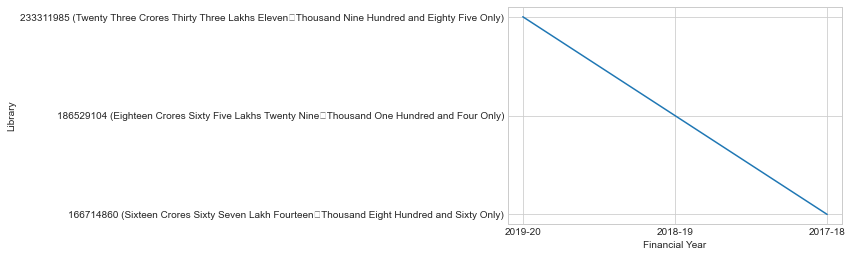

In [86]:
sns.lineplot(data=df37, y='Library', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

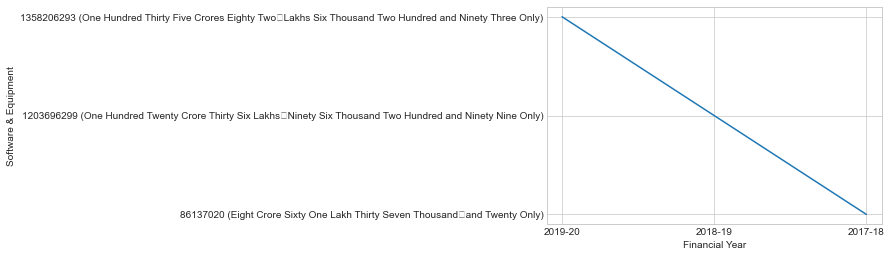

In [87]:
sns.lineplot(data=df37, y='Software & Equipment', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

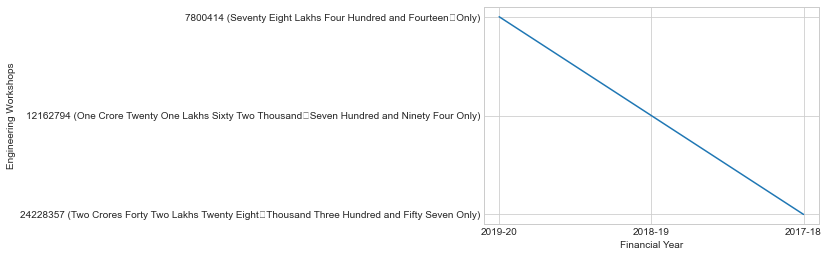

In [88]:
sns.lineplot(data=df37, y='Engineering Workshops', x='Financial Year')

## IIT Kanpur

In [89]:
df4 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{inst_id[3]}.pdf', pages='all')

df42 = df4[2]
df42

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,827,809,2015-16,0,2017-18,789,354,1400000(Fourteen\rLakhs),387
1,2015-16,827,803,2016-17,0,2018-19,770,437,1500000(Fifteen\rLakhs),301
2,2016-17,827,826,2017-18,0,2019-20,789,463,1700000(Seventeen\rLakhs),325


In [90]:
unData = ['Academic Year.1', 'Academic Year.2']
df42 = df42.drop(unData, 1)
df42

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,827,809,0,789,354,1400000(Fourteen\rLakhs),387
1,2015-16,827,803,0,770,437,1500000(Fifteen\rLakhs),301
2,2016-17,827,826,0,789,463,1700000(Seventeen\rLakhs),325


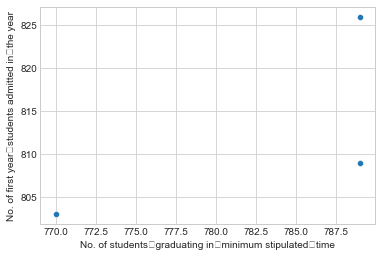

In [91]:
sns.scatterplot(y="No. of first year\rstudents admitted in\rthe year", x="No. of students\rgraduating in\rminimum stipulated\rtime", data=df42)
plt.ylabel("No. of first year\rstudents admitted in\rthe year",fontsize=10)
plt.xlabel("No. of students\rgraduating in\rminimum stipulated\rtime",fontsize=10)
plt.show()

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rplaced'>

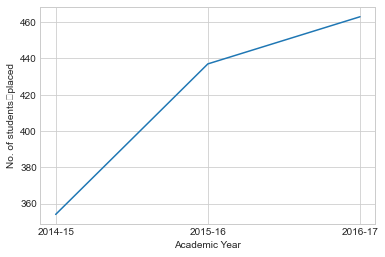

In [92]:
sns.lineplot(data=df42, y='No. of students\rplaced', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rselected for Higher\rStudies'>

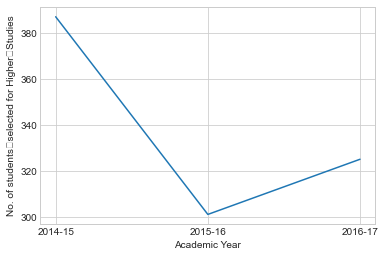

In [93]:
sns.lineplot(data=df42, y='No. of students\rselected for Higher\rStudies', x='Academic Year')

In [94]:
df410 = df4[10]
df410

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Consultancy Projects,315,246,261
1,Total no. of Client Organizations,191,123,129
2,Total Amount Received (Amount in Rupees),310320868,270496071,308824752
3,Amount Received in Words,Thirty One Crore Three Lakh Twenty Thousand Ei...,Twenty Seven Crore Four Lakh Ninety Six Thousa...,Thirty Crore Eighty Eight Lakh Twenty Four Tho...


In [95]:
df410 = df410.T
df410.reset_index(inplace=True)
df410.columns = ['Financial Year',
                   'Total no. of Consultancy Projects', 
                   'Total no. of Client Organizations',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
df410

,Financial Year,Total no. of Consultancy Projects,Total no. of Client Organizations,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Consultancy Projects,Total no. of Client Organizations,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,315,191,310320868,Thirty One Crore Three Lakh Twenty Thousand Ei...
2,2018-19,246,123,270496071,Twenty Seven Crore Four Lakh Ninety Six Thousa...
3,2017-18,261,129,308824752,Thirty Crore Eighty Eight Lakh Twenty Four Tho...


In [96]:
df410=df410.drop(0)
df410

,Financial Year,Total no. of Consultancy Projects,Total no. of Client Organizations,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,315,191,310320868,Thirty One Crore Three Lakh Twenty Thousand Ei...
2,2018-19,246,123,270496071,Twenty Seven Crore Four Lakh Ninety Six Thousa...
3,2017-18,261,129,308824752,Thirty Crore Eighty Eight Lakh Twenty Four Tho...


In [97]:
df410=df410.drop(['Amount Received in Words'], axis =1)
df410

,Financial Year,Total no. of Consultancy Projects,Total no. of Client Organizations,Total Amount Received (Amount in Rupees)
1,2019-20,315,191,310320868
2,2018-19,246,123,270496071
3,2017-18,261,129,308824752


In [98]:
df410.describe()

,Financial Year,Total no. of Consultancy Projects,Total no. of Client Organizations,Total Amount Received (Amount in Rupees)
count,3,3,3,3
unique,3,3,3,3
top,2019-20,261,191,308824752
freq,1,1,1,1


In [99]:
df410 = df410.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
df410.dtypes

Financial Year                              object
Total no. of Consultancy Projects           object
Total no. of Client Organizations           object
Total Amount Received (Amount in Rupees)     int64
dtype: object

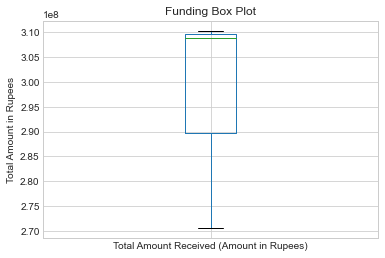

In [100]:
df410['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Funding Box Plot')
plt.ylabel('Total Amount in Rupees')
plt.show()

In [101]:
df46 = df4[6]
df46

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",168000000 (Sixteen Crore Eighty Lakh),153000000 (Fifteen Crore Thirty Lakh),129600000 (Twelve Crore Ninety Six Lakh)
3,New Equipment and software for Laboratories,685769251 (Sixty Eight Crore Fifty Seven Lakh ...,674586035 (Sixty Seven Crore Forty Five Lakh E...,621194478 (Sixty Two Crore Eleven Lakh Ninety ...
4,Engineering Workshops,98500000 (Nine Crore Eighty Five Lakh),44400000 (Four Crore Forty Four Lakh),96400000 (Nine Crore Sixty Four Lakh)
5,Other expenditure on creation of Capital Asset...,73400000 (Seven Crore Thirty Four Lakh),46700000 (Four Crore Sixty Seven Lakh),15000000 (One Crore Fifty Lakh)


In [102]:
df46 = df46.drop([0,1], axis=0)
df46

,Financial Year,2019-20,2018-19,2017-18
2,"Library ( Books, Journals and e-Resources only)",168000000 (Sixteen Crore Eighty Lakh),153000000 (Fifteen Crore Thirty Lakh),129600000 (Twelve Crore Ninety Six Lakh)
3,New Equipment and software for Laboratories,685769251 (Sixty Eight Crore Fifty Seven Lakh ...,674586035 (Sixty Seven Crore Forty Five Lakh E...,621194478 (Sixty Two Crore Eleven Lakh Ninety ...
4,Engineering Workshops,98500000 (Nine Crore Eighty Five Lakh),44400000 (Four Crore Forty Four Lakh),96400000 (Nine Crore Sixty Four Lakh)
5,Other expenditure on creation of Capital Asset...,73400000 (Seven Crore Thirty Four Lakh),46700000 (Four Crore Sixty Seven Lakh),15000000 (One Crore Fifty Lakh)


In [103]:
df46 = df46.T
df46

,2,3,4,5
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,168000000 (Sixteen Crore Eighty Lakh),685769251 (Sixty Eight Crore Fifty Seven Lakh ...,98500000 (Nine Crore Eighty Five Lakh),73400000 (Seven Crore Thirty Four Lakh)
2018-19,153000000 (Fifteen Crore Thirty Lakh),674586035 (Sixty Seven Crore Forty Five Lakh E...,44400000 (Four Crore Forty Four Lakh),46700000 (Four Crore Sixty Seven Lakh)
2017-18,129600000 (Twelve Crore Ninety Six Lakh),621194478 (Sixty Two Crore Eleven Lakh Ninety ...,96400000 (Nine Crore Sixty Four Lakh),15000000 (One Crore Fifty Lakh)


In [104]:
df46.columns = ['Library', 'Software & Equipment', 'Engineering Workshops', 'Others']
df46.reset_index(drop = True, inplace=True)

In [105]:
df46 = df46.drop(0)
df46

,Library,Software & Equipment,Engineering Workshops,Others
1,168000000 (Sixteen Crore Eighty Lakh),685769251 (Sixty Eight Crore Fifty Seven Lakh ...,98500000 (Nine Crore Eighty Five Lakh),73400000 (Seven Crore Thirty Four Lakh)
2,153000000 (Fifteen Crore Thirty Lakh),674586035 (Sixty Seven Crore Forty Five Lakh E...,44400000 (Four Crore Forty Four Lakh),46700000 (Four Crore Sixty Seven Lakh)
3,129600000 (Twelve Crore Ninety Six Lakh),621194478 (Sixty Two Crore Eleven Lakh Ninety ...,96400000 (Nine Crore Sixty Four Lakh),15000000 (One Crore Fifty Lakh)


In [106]:
finYear = ['2019-20', '2018-19', '2017-18']
df46['Financial Year'] = finYear
df46

,Library,Software & Equipment,Engineering Workshops,Others,Financial Year
1,168000000 (Sixteen Crore Eighty Lakh),685769251 (Sixty Eight Crore Fifty Seven Lakh ...,98500000 (Nine Crore Eighty Five Lakh),73400000 (Seven Crore Thirty Four Lakh),2019-20
2,153000000 (Fifteen Crore Thirty Lakh),674586035 (Sixty Seven Crore Forty Five Lakh E...,44400000 (Four Crore Forty Four Lakh),46700000 (Four Crore Sixty Seven Lakh),2018-19
3,129600000 (Twelve Crore Ninety Six Lakh),621194478 (Sixty Two Crore Eleven Lakh Ninety ...,96400000 (Nine Crore Sixty Four Lakh),15000000 (One Crore Fifty Lakh),2017-18


<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

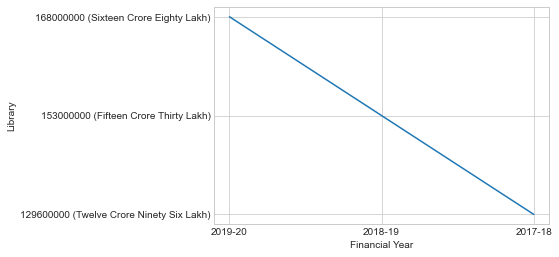

In [107]:
sns.lineplot(data=df46, y='Library', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

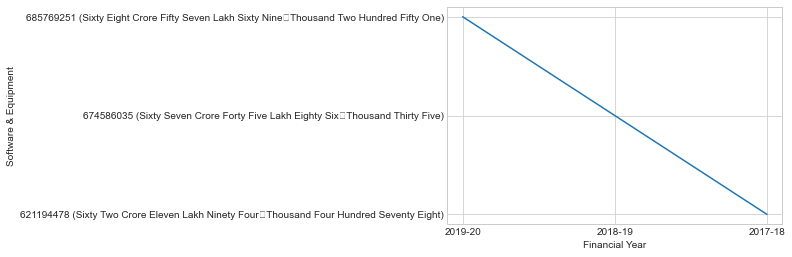

In [108]:
sns.lineplot(data=df46, y='Software & Equipment', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

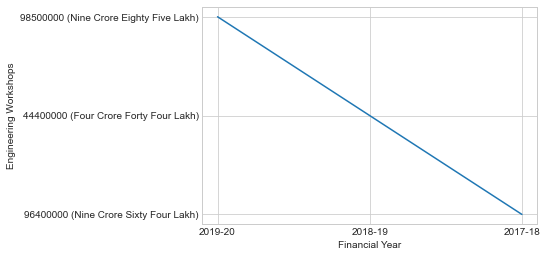

In [109]:
sns.lineplot(data=df46, y='Engineering Workshops', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Others'>

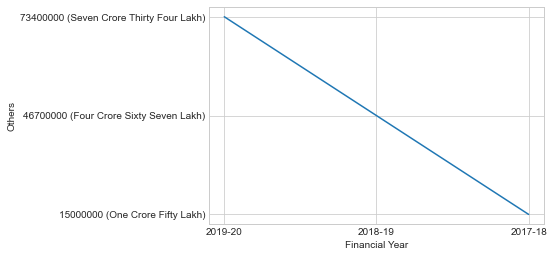

In [110]:
sns.lineplot(data=df46, y='Others', x='Financial Year')

## IIT Kharagpur

In [111]:
df5 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{inst_id[4]}.pdf', pages='all')

df52 = df5[2]
df52

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,656,641,2015-16,0,2017-18,475,391,1275000(Twelve lakh\rSeventy Five\rThousand),44
1,2015-16,656,637,2016-17,0,2018-19,535,437,1420059(Fourteen\rLakh Twenty\rThousand Fifty ...,53
2,2016-17,656,655,2017-18,0,2019-20,451,416,1600000(Sixteen Lakh),32


In [112]:
unData = ['Academic Year.1', 'Academic Year.2']
df52 = df52.drop(unData, 1)
df52

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,656,641,0,475,391,1275000(Twelve lakh\rSeventy Five\rThousand),44
1,2015-16,656,637,0,535,437,1420059(Fourteen\rLakh Twenty\rThousand Fifty ...,53
2,2016-17,656,655,0,451,416,1600000(Sixteen Lakh),32


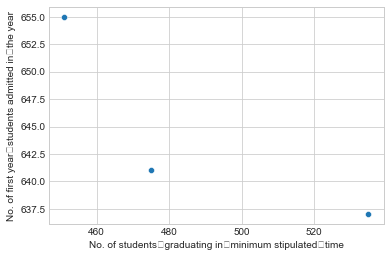

In [113]:
sns.scatterplot(y="No. of first year\rstudents admitted in\rthe year", x="No. of students\rgraduating in\rminimum stipulated\rtime", data=df52)
plt.ylabel("No. of first year\rstudents admitted in\rthe year",fontsize=10)
plt.xlabel("No. of students\rgraduating in\rminimum stipulated\rtime",fontsize=10)
plt.show()

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rplaced'>

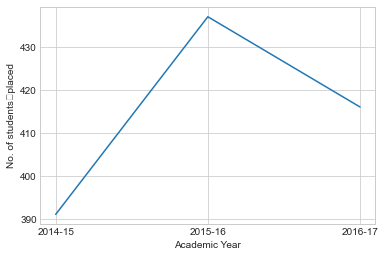

In [114]:
sns.lineplot(data=df52, y='No. of students\rplaced', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students\rselected for Higher\rStudies'>

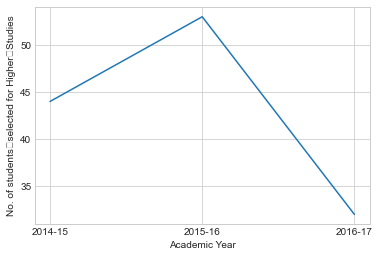

In [115]:
sns.lineplot(data=df52, y='No. of students\rselected for Higher\rStudies', x='Academic Year')

In [116]:
df511 = df5[11]
df511

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,154,700,627
1,Total no. of Funding Agencies,65,193,202
2,Total Amount Received (Amount in Rupees),648432016,1349147118,2051250000
3,Amount Received in Words,Sixty Four Crore Eighty Four lakh Thirty Two T...,One Three Four Crore Ninety One Lakh Forty Sev...,Two Zero Five Crore Twelve Lakh Fifty Thousand


In [117]:
df511 = df511.T
df511.reset_index(inplace=True)
df511.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
df511

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,154,65,648432016,Sixty Four Crore Eighty Four lakh Thirty Two T...
2,2018-19,700,193,1349147118,One Three Four Crore Ninety One Lakh Forty Sev...
3,2017-18,627,202,2051250000,Two Zero Five Crore Twelve Lakh Fifty Thousand


In [118]:
df511=df511.drop(0)
df511

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,154,65,648432016,Sixty Four Crore Eighty Four lakh Thirty Two T...
2,2018-19,700,193,1349147118,One Three Four Crore Ninety One Lakh Forty Sev...
3,2017-18,627,202,2051250000,Two Zero Five Crore Twelve Lakh Fifty Thousand


In [119]:
df511=df511.drop(['Amount Received in Words'], axis =1)
df511

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,154,65,648432016
2,2018-19,700,193,1349147118
3,2017-18,627,202,2051250000


In [120]:
df511.describe()

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
count,3,3,3,3
unique,3,3,3,3
top,2019-20,154,193,2051250000
freq,1,1,1,1


In [121]:
df511 = df511.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
df511.dtypes

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object

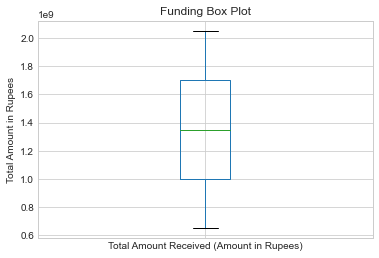

In [122]:
df511['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Funding Box Plot')
plt.ylabel('Total Amount in Rupees')
plt.show()

In [123]:
df59 = df5[9]
df59

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",227325689 (Twenty Two Crores Seventy Three Lak...,220397215 (twenty two crore three lakh ninety ...,175230715 (seventeen crore fifty two lakh thir...
3,New Equipment and software for Laboratories,224238505 (Twenty Two Crores Forty Two Lakhs T...,117316668 (eleven crore seventy three lakh six...,284543926 (twenty eight crore forty five lakh ...
4,Engineering Workshops,0 (Zero),0 (zero),0 (zero)
5,Other expenditure on creation of Capital Asset...,275567881 (Twenty Seven Crores Fifty Five Lakh...,589182201 (fifty eight crore ninety one lakh e...,356546168 (thirty five crore sixty five lakh f...


In [124]:
df59 = df59.drop([0, 1])
df59

,Financial Year,2019-20,2018-19,2017-18
2,"Library ( Books, Journals and e-Resources only)",227325689 (Twenty Two Crores Seventy Three Lak...,220397215 (twenty two crore three lakh ninety ...,175230715 (seventeen crore fifty two lakh thir...
3,New Equipment and software for Laboratories,224238505 (Twenty Two Crores Forty Two Lakhs T...,117316668 (eleven crore seventy three lakh six...,284543926 (twenty eight crore forty five lakh ...
4,Engineering Workshops,0 (Zero),0 (zero),0 (zero)
5,Other expenditure on creation of Capital Asset...,275567881 (Twenty Seven Crores Fifty Five Lakh...,589182201 (fifty eight crore ninety one lakh e...,356546168 (thirty five crore sixty five lakh f...


In [125]:
df59 = df59.T
df59

,2,3,4,5
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...
2018-19,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...
2017-18,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...


In [126]:
df59.columns = ['Library', 'Software & Equipment', 'Engineering Workshops', 'Others']
df59.reset_index(drop = True, inplace=True)

In [127]:
df59

,Library,Software & Equipment,Engineering Workshops,Others
0,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
1,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...
2,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...
3,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...


In [128]:
df59 = df59.drop(0)
df59

,Library,Software & Equipment,Engineering Workshops,Others
1,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...
2,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...
3,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...


In [129]:
finYear = ['2019-20', '2018-19', '2017-18']
df59['Financial Year'] = finYear

In [130]:
df59

,Library,Software & Equipment,Engineering Workshops,Others,Financial Year
1,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...,2019-20
2,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...,2018-19
3,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...,2017-18


<AxesSubplot:xlabel='Financial Year', ylabel='Library'>

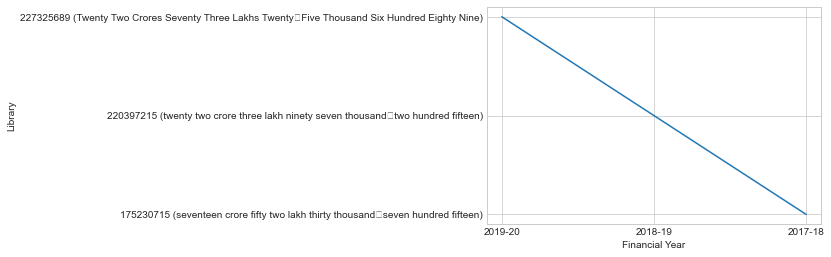

In [131]:
sns.lineplot(data=df59, y='Library', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Software & Equipment'>

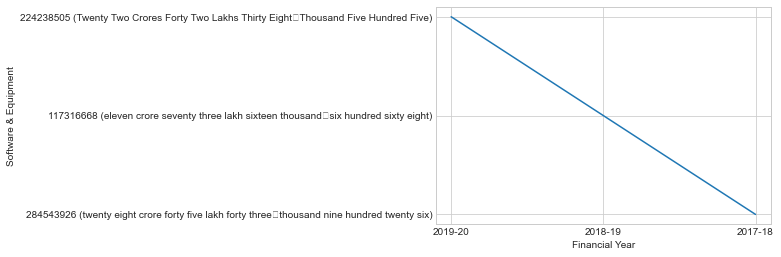

In [132]:
sns.lineplot(data=df59, y='Software & Equipment', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Engineering Workshops'>

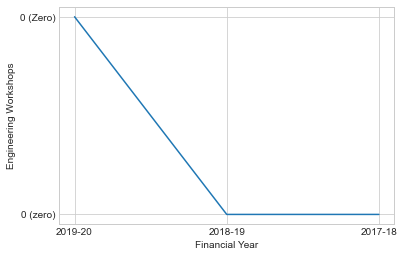

In [133]:
sns.lineplot(data=df59, y='Engineering Workshops', x='Financial Year')

<AxesSubplot:xlabel='Financial Year', ylabel='Others'>

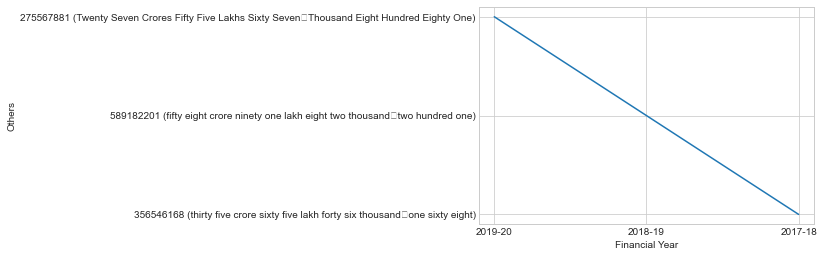

In [134]:
sns.lineplot(data=df59, y='Others', x='Financial Year')

There are many attributes or tables to analyse the data but we analyzed most important data above. and we can further do analysis on data in such way.